In [564]:
#Import the python packages I'll need
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy import constants as const
from scipy.integrate import solve_ivp
import scipy.integrate as integrate

In [565]:
#Define important constants
c = const.c.cgs
e = const.e.esu
m = const.m_e.cgs
Z = 2
bohr = const.a0.cgs

In [592]:
#Define all necessary functions
def run(x0,y0,dxdt0,dydt0):
    times,x,y,vx,vy,ax,ay = initialize(x0,y0,dxdt0,dydt0) #Initialize arrays and initial conditions
    x,y,vx,vy,ax,ay = euler(x,y,vx,vy,ax,ay) #Use Euler's method to compute position, velocity, and acceleration
    w,axw,ayw = fourier(ax,ay) #Compute fourier transform of x and y components of acceleration
    plotting(times,w,x,y,vx,vy,ax,ay,axw,ayw) #Plot everything!
    
def initialize(x0,y0,dxdt0,dydt0): 
    #Initialize numpy arrays that will hold our calculated values
    times = np.linspace(0,1e-13,5000) * u.s
    ax = np.zeros((len(times))) * u.cm/u.s/u.s
    ay = np.zeros((len(times))) * u.cm/u.s/u.s
    x = np.zeros((len(times))) * u.cm
    y = np.zeros((len(times))) * u.cm
    vx = np.zeros((len(times))) * u.cm/u.s
    vy = np.zeros((len(times))) * u.cm/u.s

    #Add initial conditions to those numpy arrays
    x[0] = x0
    y[0]= y0
    vx[0]=dxdt0
    vy[0]=dydt0
    ax[0]= (-Z*e**2*(x[0]))/(m*((x[0])**2+(y[0])**2)**1.5)
    ay[0]= (-Z*e**2*(y[0]))/(m*((x[0])**2+(y[0])**2)**1.5)
    
    return times,x,y,vx,vy,ax,ay

#Define a function that loops through all values of time and uses Euler's method to calculate the subsequent value
def euler(x,y,vx,vy,ax,ay):
    for i in range(1,len(times)):
        x[i] = vx[i-1]*(times[i]-times[i-1])+x[i-1]

        y[i] = vy[i-1]*(times[i]-times[i-1])+y[i-1]

        ax[i] = (-Z*e**2*(x[i]))/(m*((x[i])**2+(y[i])**2)**1.5)
        
        ay[i] = (-Z*e**2*(y[i]))/(m*((x[i])**2+(y[i])**2)**1.5)

        vx[i] = ax[i-1]*(times[i]-times[i-1])+vx[i-1]

        vy[i] = ay[i-1]*(times[i]-times[i-1])+vy[i-1]
    return [x,y,vx,vy,ax,ay]

def fourier(ax,ay):

    #Take the Fourier transform of acceleration to put it in frequency space instead of time
    
    #Define array of frequency values
    w = np.linspace(0,10**18,100) / u.s
    
    axw = np.zeros(0) * u.cm/u.s/u.s
    ayw = np.zeros(0) * u.cm/u.s/u.s
    
    #Compute the fourier transform by looping over all values of frequency
    for freq in w:
        #Compute integrand array
        integrandx = np.zeros(len(ax)) * u.cm/u.s/u.s
        integrandy = np.zeros(len(ay)) * u.cm/u.s/u.s
        for i in range(len(ax)):
            integrandx[i]=(ax[i]*np.exp(-1*1j*freq*times[i]))
            integrandy[i]=(ay[i]*np.exp(-1*1j*freq*times[i]))
        resultx = integrate.simpson(integrandx, x=times) * u.cm/u.s/u.s
        resulty = integrate.simpson(integrandy, x=times) * u.cm/u.s/u.s
        axw = np.append(axw,resultx)
        ayw = np.append(ayw,resulty)
    return w,axw,ayw

def plotting(times,w,x,y,vx,vy,ax,ay,axw,ayw):
    #Plot the relevant figures!
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'V_x0 = {dxdt0}, b = {y0/bohr} Bohr Radii')
    
    #Plot position
    axs[0][0].plot(x/bohr,y/bohr)
    axs[0][0].scatter(0,0,color='red', label='Ion')
    axs[0][0].set_title('Electron Position Over Time')
    axs[0][0].set_xlabel('X (Bohr Radii)')
    axs[0][0].set_ylabel('Y (Bohr Radii)')
    axs[0][0].legend()
    
    #Plot x/y components of velocity
    axs[0][1].plot(times,vx,color='blue',label='V_x')
    axs[0][1].plot(times,vy,color='red',label='V_y')
    axs[0][1].set_title('Components of Velocity')
    axs[0][1].set_xlabel('Time (s)')
    axs[0][1].set_ylabel('Velocity (cm/s)')
    axs[0][1].legend()
    
    #Plot x/y components of acceleration 
    axs[1][0].plot(times,ax,color='blue',label='a_x')
    axs[1][0].plot(times,ay,color='red',label='a_y')
    axs[1][0].set_title('Components of Acceleration')
    axs[1][0].set_xlabel('Time (s)')
    axs[1][0].set_ylabel('Acceleration (cm/s/s)')
    axs[1][0].legend()
    
    #Plot power spectrum
    axs[1][1].plot(w,axw**2+ayw**2)
    axs[1][1].set_title('Power Spectrum')
    axs[1][1].set_xlabel('Frequency (rad/s)')
    axs[1][1].set_ylabel('Power')

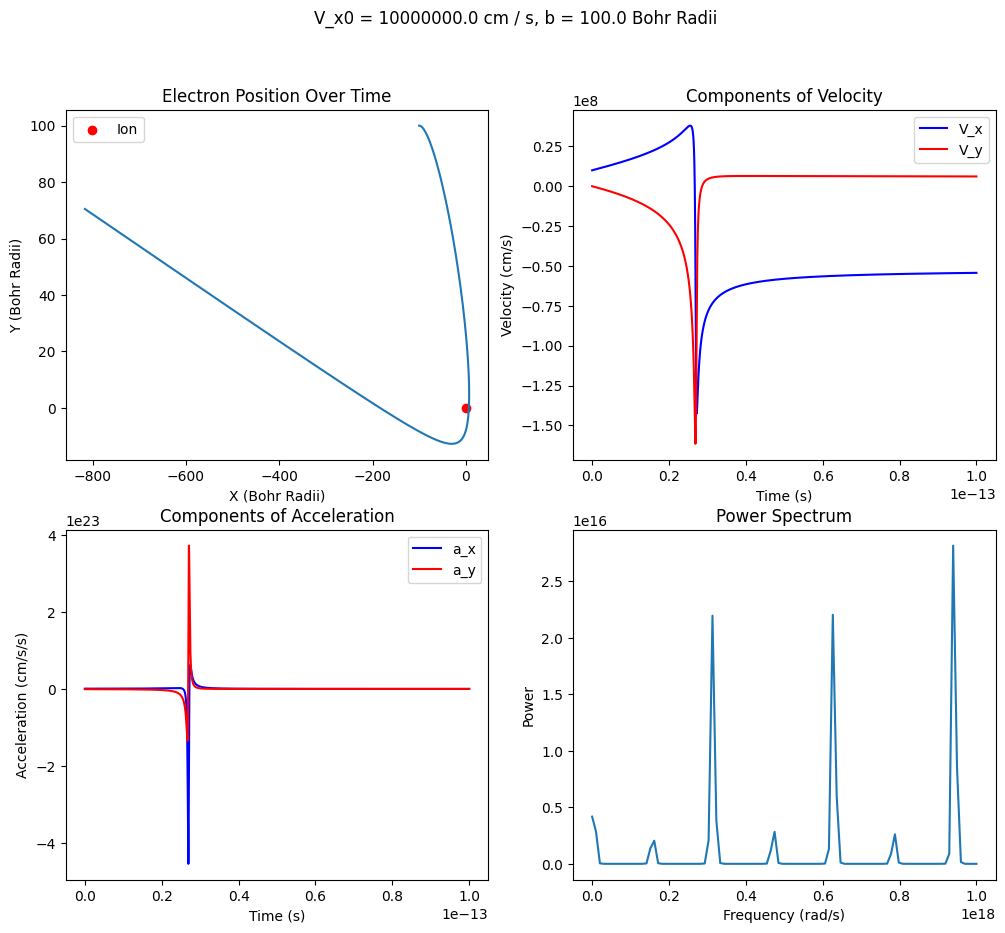

In [593]:
#Define initial conditions
x0 = -100 * bohr
y0 = 100 * bohr
dxdt0 = 10**7 * u.cm/u.s
dydt0 = 0 * u.cm/u.s

run(x0,y0,dxdt0,dydt0)

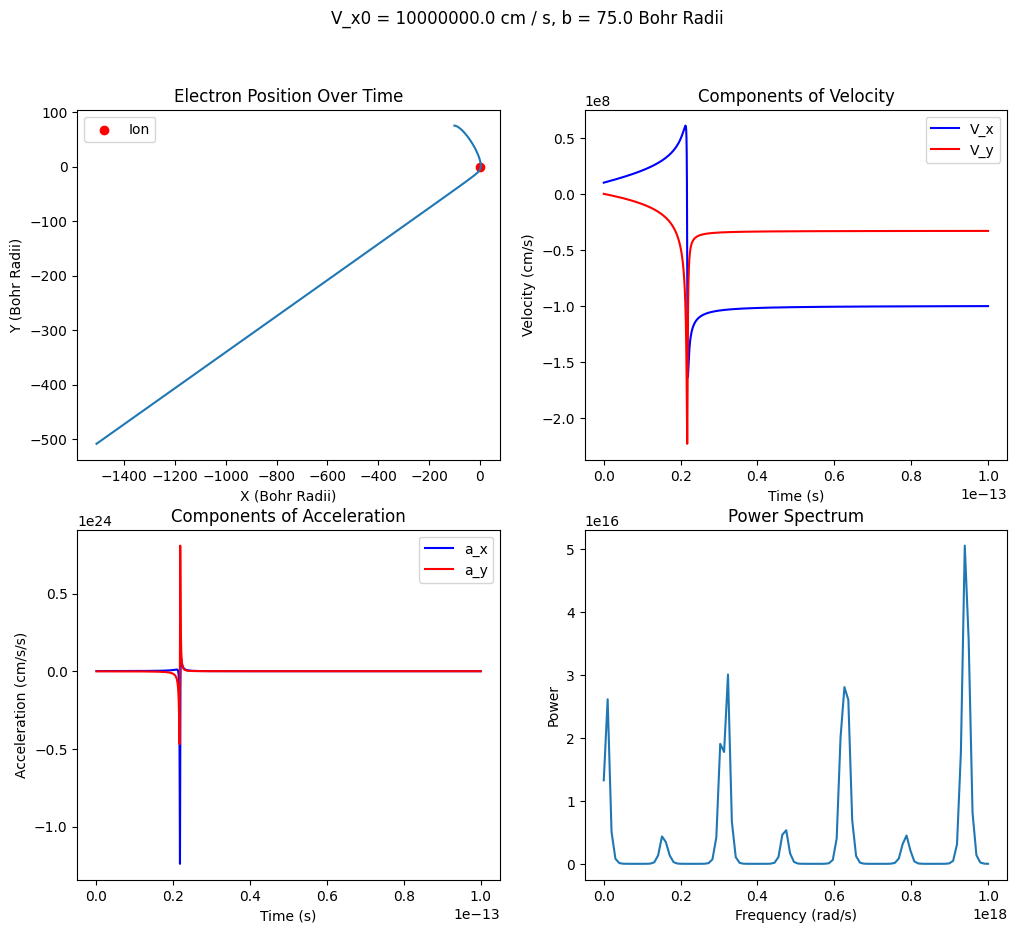

In [595]:
#Now try another set of initial conditions
x0 = -100 * bohr
y0 = 75 * bohr
dxdt0 = 10**7 * u.cm/u.s
dydt0 = 0 * u.cm/u.s

run(x0,y0,dxdt0,dydt0)

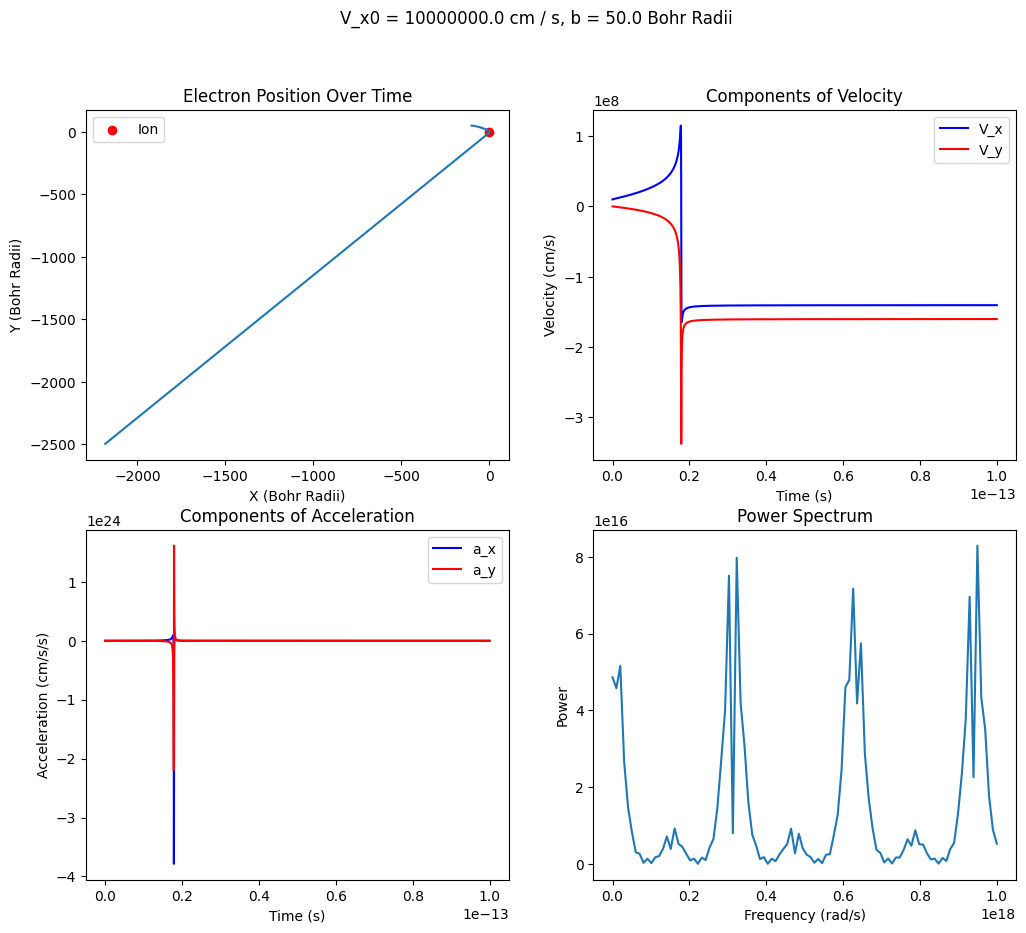

In [594]:
#Now try another set of initial conditions
x0 = -100 * bohr
y0 = 50 * bohr
dxdt0 = 10**7 * u.cm/u.s
dydt0 = 0 * u.cm/u.s

run(x0,y0,dxdt0,dydt0)

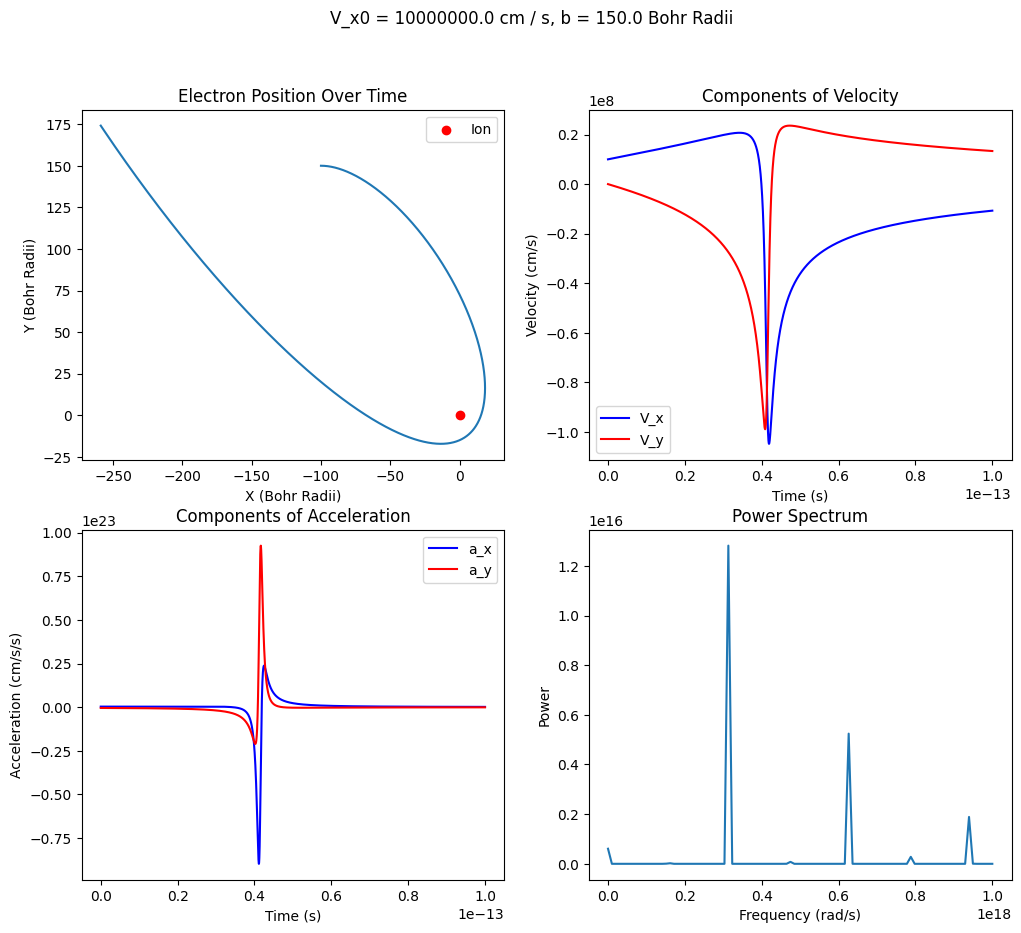

In [596]:
#Now try another set of initial conditions
x0 = -100 * bohr
y0 = 150 * bohr
dxdt0 = 10**7 * u.cm/u.s
dydt0 = 0 * u.cm/u.s

run(x0,y0,dxdt0,dydt0)

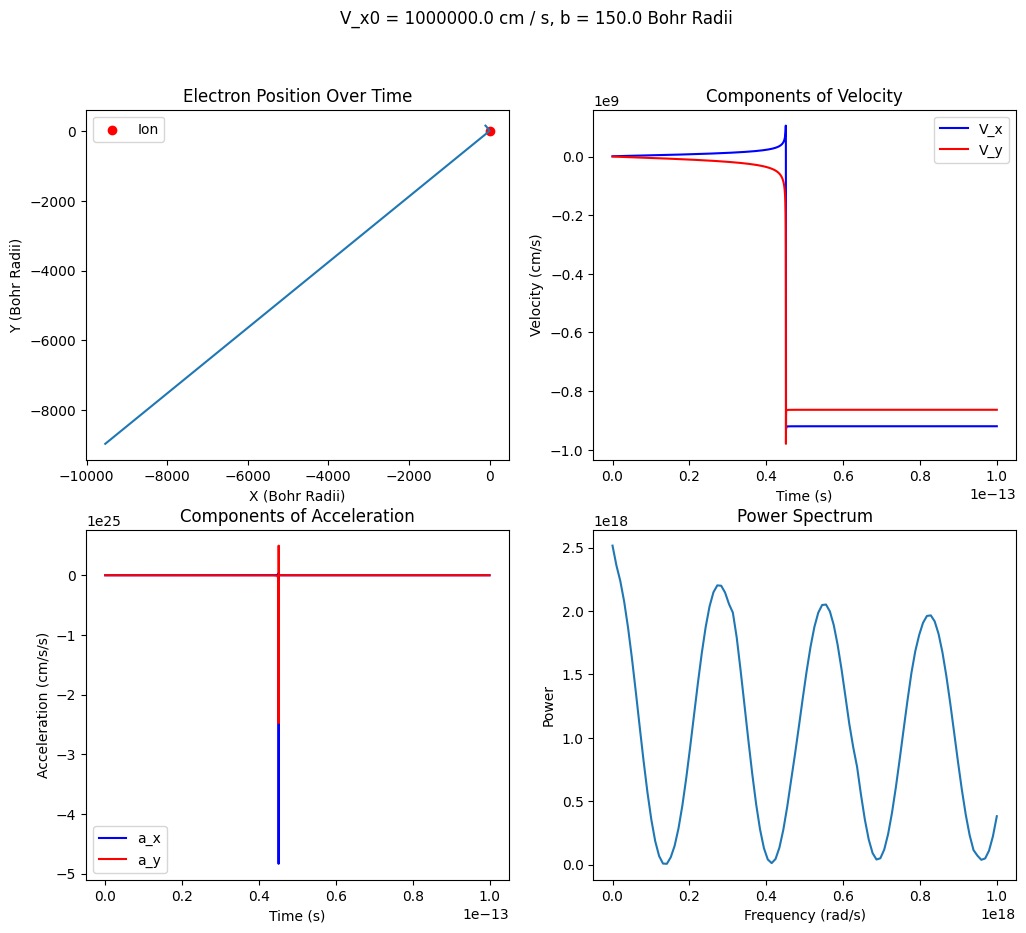

In [598]:
#Now try another set of initial conditions
x0 = -100 * bohr
y0 = 150 * bohr
dxdt0 = 10**6 * u.cm/u.s
dydt0 = 0 * u.cm/u.s

run(x0,y0,dxdt0,dydt0)

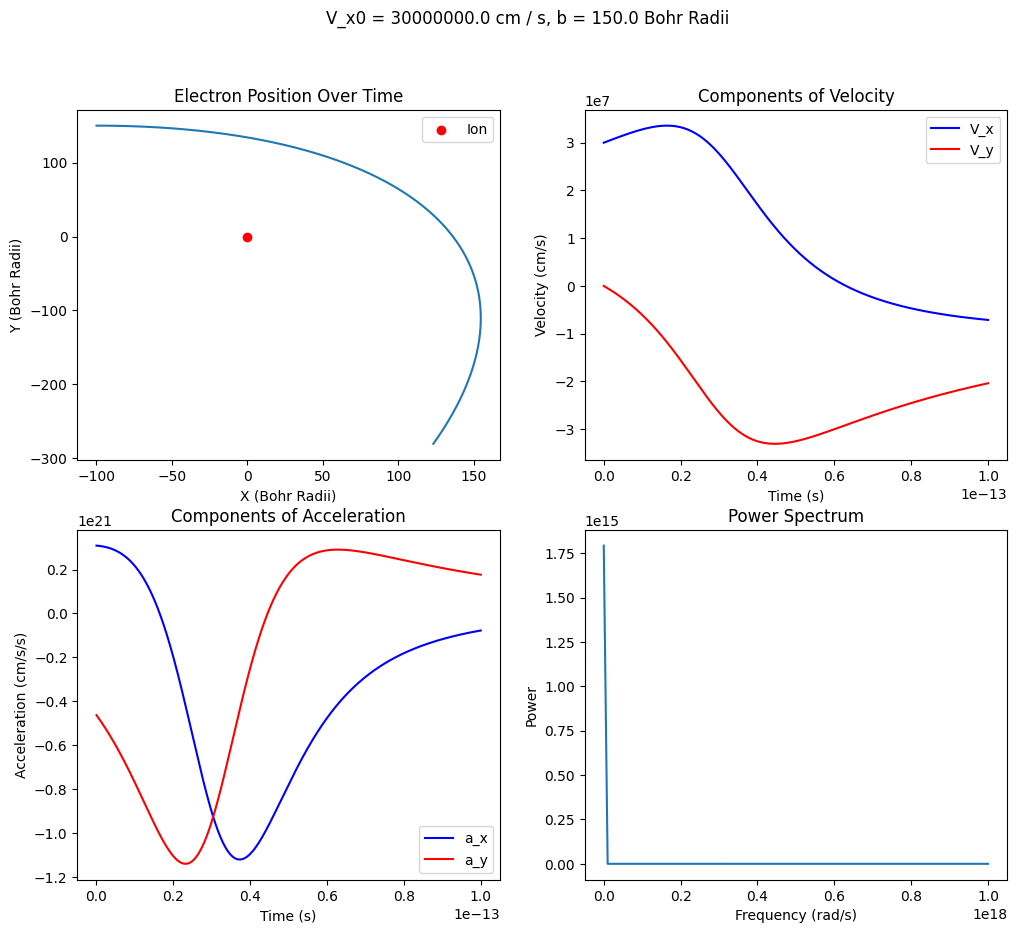

In [601]:
#Now try another set of initial conditions
x0 = -100 * bohr
y0 = 150 * bohr
dxdt0 = 3e7 * u.cm/u.s
dydt0 = 0 * u.cm/u.s

run(x0,y0,dxdt0,dydt0)